In [27]:
import pandas as pd
import numpy as np
import random as rnd

# Creación de datos artificiales para Análisis de Covid

In [3]:
data = []
n = 60000

columns = ["edad", "genero","tos", "temperatura", "dolor_garganta", "malestar_general", "COVID"]
for i in range(n//2):
  edad = np.random.choice(np.arange(1, 11), p=[0.2,0.2,0.3,0.1,0.1,0.035,0.035,0.015,0.014,0.001])
  edad = rnd.randint((edad-1)*10+1, edad*10)
  genero = rnd.randint(0,1)
  tos = np.random.choice(np.arange(0, 4), p=[0.6,0.3,0.075,0.025])
  temperatura = np.random.choice(np.arange(36,41), p=[0.6,0.3,0.05,0.025,0.025])
  dolor_garganta = np.random.choice(np.arange(0,4), p=[0.6,0.3,0.075,0.025])
  malestar_general = np.random.choice(np.arange(0,4), p=[0.6,0.3,0.075,0.025])
  data.append([edad, genero, tos, temperatura, dolor_garganta, malestar_general, 0])
for i in range(n//2):
  edad = np.random.choice(np.arange(1, 11), p=[0.2,0.2,0.3,0.1,0.1,0.035,0.035,0.015,0.014,0.001])
  edad = rnd.randint((edad-1)*10+1, edad*10)
  genero = rnd.randint(0,1)
  tos = np.random.choice(np.arange(0, 4), p=[0.025,0.075,0.3,0.6])
  temperatura = np.random.choice(np.arange(36,41), p=[0.025,0.025,0.05,0.3,0.6])
  dolor_garganta = np.random.choice(np.arange(0, 4), p=[0.025,0.075,0.3,0.6])
  malestar_general = np.random.choice(np.arange(0, 4), p=[0.025,0.075,0.3,0.6])
  data.append([edad, genero, tos, temperatura, dolor_garganta, malestar_general, 1])

df = pd.DataFrame(data, columns = columns)
df.head(20)
  

,edad,genero,tos,temperatura,dolor_garganta,malestar_general,COVID
0,48,1,0,36,2,0,0
1,13,1,0,36,2,1,0
2,38,0,2,36,1,0,0
3,28,1,2,36,1,0,0
4,30,0,0,36,0,1,0
5,6,1,0,39,0,1,0
6,50,0,2,36,1,0,0
7,21,1,0,36,0,0,0
8,18,1,2,36,1,0,0
9,45,0,0,38,1,0,0


In [4]:
for col in df.columns:
  print(df[col].value_counts())

25    1873
24    1863
26    1841
23    1841
29    1817
      ... 
95       6
97       5
91       4
98       4
94       3
Name: edad, Length: 100, dtype: int64
1    30095
0    29905
Name: genero, dtype: int64
3    18774
0    18687
2    11320
1    11219
Name: tos, dtype: int64
40    18849
36    18788
39     9695
37     9663
38     3005
Name: temperatura, dtype: int64
3    18805
0    18793
1    11241
2    11161
Name: dolor_garganta, dtype: int64
0    18663
3    18629
2    11379
1    11329
Name: malestar_general, dtype: int64
1    30000
0    30000
Name: COVID, dtype: int64


In [29]:
df = pd.read_csv("artifitial_covid_testing.csv")
df.head()

,edad,genero,tos,temperatura,dolor_garganta,malestar_general,COVID
0,48,1,0,36,2,0,0
1,13,1,0,36,2,1,0
2,38,0,2,36,1,0,0
3,28,1,2,36,1,0,0
4,30,0,0,36,0,1,0


In [44]:
df[(df["edad"]==20) & (df["genero"]==0) & (df["temperatura"]==36) & (df["tos"]==0) & (df["dolor_garganta"]==0) & (df["malestar_general"]==0)].head()

,edad,genero,tos,temperatura,dolor_garganta,malestar_general,COVID
464,20,0,0,36,0,0,0
919,20,0,0,36,0,0,0
6451,20,0,0,36,0,0,0
6986,20,0,0,36,0,0,0
7314,20,0,0,36,0,0,0


# Creación de datos artificiales para Grupo de Riesgo (Fallecidos)

In [21]:
df.to_csv('artifitial_covid_testing.csv', index = False)

In [6]:
df_fallecidos = pd.read_csv("fallecidos.csv")
df_fallecidos.head()

,ETAPA_DE_VIDA,EDAD,SEXO,DEPARTAMENTO,CATEGORIA
0,ADULTO_MAYOR,70,Masculino,SAN_MARTIN,MINSA
1,ADULTO,60,Masculino,LA_LIBERTAD,ESSALUD
2,ADULTO_MAYOR,80,Femenino,LA_LIBERTAD,ESSALUD
3,ADULTO_MAYOR,70,Masculino,LIMA,ESSALUD
4,ADULTO,60,Masculino,LAMBAYEQUE,MINSA


In [24]:
df2 = df_fallecidos.copy()
df2 = df2[["EDAD","SEXO"]]
df2.columns = ["edad","genero"]
df2.head()

,edad,genero
0,70,Masculino
1,60,Masculino
2,80,Femenino
3,70,Masculino
4,60,Masculino


In [25]:
df2["genero"] = np.where(df2["genero"]=="Masculino", 0, 1)
df2["edad"] = pd.to_numeric(df2["edad"])
df2["cardio_disease"] = 0
df2["diabetes"] = 0
df2["resp_disease"] = 0
df2["hipertension"] = 0
df2["cancer"] = 0
for i in range(df2.shape[0]):
  df2.loc[i,"edad"] = rnd.randint(df2.loc[i,"edad"]-10, df2.loc[i,"edad"]-1)
  if df2.loc[i,"edad"]>60:
    df2.loc[i,"cardio_disease"] = np.random.choice(np.arange(0, 2), p=[0.2, 0.8])
    df2.loc[i,"diabetes"] = np.random.choice(np.arange(0, 2), p=[0.2, 0.8])
    df2.loc[i,"resp_disease"] = np.random.choice(np.arange(0, 2), p=[0.2, 0.8])
    df2.loc[i,"hipertension"] = np.random.choice(np.arange(0, 2), p=[0.2, 0.8])
    df2.loc[i,"cancer"] = np.random.choice(np.arange(0, 2), p=[0.2, 0.8])
  elif df2.loc[i,"edad"]>30:
    df2.loc[i,"cardio_disease"] = np.random.choice(np.arange(0, 2), p=[0.4, 0.6])
    df2.loc[i,"diabetes"] = np.random.choice(np.arange(0, 2), p=[0.4, 0.6])
    df2.loc[i,"resp_disease"] = np.random.choice(np.arange(0, 2), p=[0.4, 0.6])
    df2.loc[i,"hipertension"] = np.random.choice(np.arange(0, 2), p=[0.4, 0.6])
    df2.loc[i,"cancer"] = np.random.choice(np.arange(0, 2), p=[0.4, 0.6])
  else:
    df2.loc[i,"cardio_disease"] = np.random.choice(np.arange(0, 2), p=[0.6, 0.4])
    df2.loc[i,"diabetes"] = np.random.choice(np.arange(0, 2), p=[0.6, 0.4])
    df2.loc[i,"resp_disease"] = np.random.choice(np.arange(0, 2), p=[0.6, 0.4])
    df2.loc[i,"hipertension"] = np.random.choice(np.arange(0, 2), p=[0.6, 0.4])
    df2.loc[i,"cancer"] = np.random.choice(np.arange(0, 2), p=[0.6, 0.4])
df2.head()

,edad,genero,cardio_disease,diabetes,resp_disease,hipertension,cancer
0,68,0,1,1,1,1,1
1,52,0,0,0,0,0,1
2,76,1,1,1,1,1,0
3,63,0,1,1,1,1,0
4,58,0,1,0,1,0,1


In [26]:
df2.to_csv('artifitial_pacients.csv', index = False)

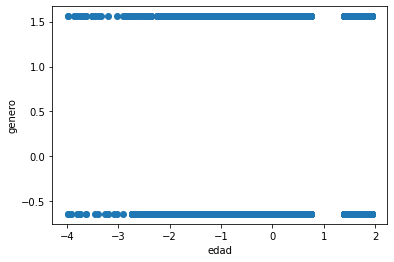

,edad,genero,cardio_disease
0,-0.095236,-0.641039,-0.755471
1,-0.933511,-0.641039,1.323677
2,0.443655,1.559969,-0.755471
3,0.084394,-0.641039,-0.755471
4,-0.514374,-0.641039,1.323677


In [13]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

columns = df2.columns.values
df2_standarized = pd.DataFrame(preprocessing.scale(df2),columns=columns)
plt.scatter(df2_standarized["edad"],df2_standarized["genero"])
plt.xlabel("edad")
plt.ylabel("genero")
plt.show()
df2_standarized.head()

# Creación de datos artificiales para Grupos de Riesgos (Personas)

In [46]:
data2 = []
n = 20000

columns = ["edad", "genero"]
for i in range(n):
  edad = np.random.choice(np.arange(1, 11), p=[0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.05,0.05])
  edad = rnd.randint((edad-1)*10+1, edad*10)
  genero = rnd.randint(0,1)
  data2.append([edad, genero])

df3 = pd.DataFrame(data2, columns = columns)
df3.head(20)

,edad,genero
0,53,0
1,29,1
2,15,1
3,1,1
4,72,1
5,15,0
6,79,0
7,14,1
8,24,1
9,46,1


In [49]:
df3["genero"] = np.where(df3["genero"]=="Masculino", 0, 1)
df3["edad"] = pd.to_numeric(df3["edad"])
df3["cardio_disease"] = 0
df3["diabetes"] = 0
df3["resp_disease"] = 0
df3["hipertension"] = 0
df3["cancer"] = 0
for i in range(df3.shape[0]):
  df3.loc[i,"edad"] = rnd.randint(df3.loc[i,"edad"]-10, df3.loc[i,"edad"]-1)
  if df3.loc[i,"edad"]>60:
    df3.loc[i,"cardio_disease"] = np.random.choice(np.arange(0, 2), p=[0.70, 0.30])
    df3.loc[i,"diabetes"] = np.random.choice(np.arange(0, 2), p=[0.70, 0.30])
    df3.loc[i,"resp_disease"] = np.random.choice(np.arange(0, 2), p=[0.70, 0.30])
    df3.loc[i,"hipertension"] = np.random.choice(np.arange(0, 2), p=[0.70, 0.30])
    df3.loc[i,"cancer"] = np.random.choice(np.arange(0, 2), p=[0.70, 0.30])
  elif df3.loc[i,"edad"]>30:
    df3.loc[i,"cardio_disease"] = np.random.choice(np.arange(0, 2), p=[0.85, 0.15])
    df3.loc[i,"diabetes"] = np.random.choice(np.arange(0, 2), p=[0.85, 0.15])
    df3.loc[i,"resp_disease"] = np.random.choice(np.arange(0, 2), p=[0.85, 0.15])
    df3.loc[i,"hipertension"] = np.random.choice(np.arange(0, 2), p=[0.85, 0.15])
    df3.loc[i,"cancer"] = np.random.choice(np.arange(0, 2), p=[0.85, 0.15])
  else:
    df3.loc[i,"cardio_disease"] = np.random.choice(np.arange(0, 2), p=[0.95, 0.05])
    df3.loc[i,"diabetes"] = np.random.choice(np.arange(0, 2), p=[0.95, 0.05])
    df3.loc[i,"resp_disease"] = np.random.choice(np.arange(0, 2), p=[0.95, 0.05])
    df3.loc[i,"hipertension"] = np.random.choice(np.arange(0, 2), p=[0.95, 0.05])
    df3.loc[i,"cancer"] = np.random.choice(np.arange(0, 2), p=[0.95, 0.05])
df3.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,edad,genero,cardio_disease,diabetes,resp_disease,hipertension,cancer
0,51,1,0,0,0,0,0
1,20,1,0,0,0,0,0
2,13,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,69,1,0,0,0,0,1


In [50]:
df3.to_csv('artifitial_pacients2.csv', index = False)